# 데이터 불러오기 & train, test set 나누어주기

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import chart_studio.plotly as py
import cufflinks as cf
cf.go_offline(connected=True)

train = pd.read_excel('teeth_data/teeth_train_re.xlsx', index_col=0)
test1 = pd.read_excel('teeth_data/teeth_test_re.xlsx', index_col=0)

In [2]:
train

,star,img,modi_text,senti_score,tokenized,dict_score,text_len,text_len_section,senti_analy,kmeans_cluster,hierarchical_cluster,dbscan_cluster,spectral_cluster,유용성
0,2.5,10,후기 믿고 구매했어요 얇고 길쭉해서 그립감이 좋아요,0.965189,"['후기', '믿', '고', '구매', '하', '었', '어요', '얇', '고...",1,29,10,5,0,2,0,0,1
1,2.0,10,아직은 사용한 지 얼마 안 돼서 효과가 얼마나 뛰어난지 모르겠지만 패키지가 너무 이...,0.992339,"['아직', '은', '사용', '하', 'ㄴ', '지', '얼마', '안', '되...",7,73,20,5,0,1,0,0,0
2,2.5,0,커피나 맥주 어쩔 수 없이 마시게 되는데 바로 양치해도 치아색을 살리기는 힘들더라고...,0.875070,"['커피나', '맥주', '어쩌', 'ㄹ', '수', '없이', '마시', '게',...",3,236,20,5,0,3,0,4,1
3,2.5,0,받자마자 1일 1회씩 3일 동안 사용했어요 유난히 주변 치아에 비해 양쪽 위아래 송...,0.043314,"['받', '자마자', '1', '일', '1', '회', '씩', '3', '일'...",-1,127,20,-5,0,0,0,0,0
4,1.5,0,음 바로 효과 나서 깜짝 놀랐어요 그런데 그게 다네요 아침저녁으로 한 번씩 바르는데...,0.020545,"['음', '바로', '효과', '나', '아서', '깜짝', '놀라', '었', ...",1,71,20,-5,0,4,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,2.0,0,아직 한 번밖에 안 써봐서 잘 모르겠지만 일단 편리하네요 효과 있으면 좋겠어요,0.982838,"['아직', '한', '번', '밖에', '안', '써보', '아서', '잘', '...",1,43,15,5,0,0,0,4,0
796,1.5,0,아직 사용한 지 얼마 되지 않아 효과를 보기엔 시간이 이르지만 기대가 됩니다,0.521816,"['아직', '사용', '하', 'ㄴ', '지', '얼마', '되', '지', '않...",1,42,15,5,0,2,0,0,0
797,2.5,10,잘 도착했는데 효과가 어떨지 기대해봐야겠어요 다른 붙이는 제품도 써본 적 있는데 여...,0.974562,"['잘', '도착', '하', '었', '는데', '효과', '가', '어떻', '...",3,120,20,5,0,3,0,0,1
798,2.5,10,잘 받았습니다 사이즈가 굉장히 작네요 커피를 너무 좋아하는데 이가 부쩍 어두워져서 ...,0.987928,"['잘', '받', '았', '습니다', '사이즈', '가', '굉장히', '작',...",1,66,20,5,0,0,0,0,1


In [3]:
test1.head()

,star,img,modi_text,senti_score,tokenized,dict_score,text_len,text_len_section,senti_analy,kmeans_cluster,hierarchical_cluster,dbscan_cluster,spectral_cluster
0,1.5,10,사실 잘 모르겠는데 그냥 안 쓴 것보다는 낫겠지 생각해요 치약이랑 같이 쓰는데 다 ...,0.495051,"['사실', '잘', '모르', '겠', '는데', '그냥', '안', '쓰', '...",-1,51,15,-5,0,4,0,0
1,2.5,10,아직 사용 전이지만 기대하고 써봐야죠 안 한 것보단 낫겠죠,0.551849,"['아직', '사용', '전', '이', '지만', '기대', '하', '고', '...",1,33,15,5,0,2,0,0
2,1.5,0,아직까지는 효과가 있는지 모르겠지만 열심히 바르고 있습니다,0.937374,"['아직', '까', '지', '는', '효과', '가', '있', '는지', '모...",2,32,15,5,0,3,0,0
3,2.5,0,배송은 굉장히 빨랐고요 일단 써보고 다시 후기 남기겠습니다,0.914611,"['배송', '은', '굉장히', '빠르', '았', '고요', '일단', '쓰',...",2,32,15,5,0,2,0,0
4,2.0,10,빠르게 미백효과 생겨서 좋아요 용량 조절이 어렵긴 하지만요,0.961752,"['빠르', '게', '미백', '효과', '생기', '어서', '좋', '아요',...",0,32,15,5,0,2,0,0


In [4]:
train.drop(columns=['tokenized','kmeans_cluster','dbscan_cluster','spectral_cluster', 'modi_text', 'senti_score','text_len_section', 'hierarchical_cluster'], inplace=True)
train.head()

,star,img,dict_score,text_len,senti_analy,유용성
0,2.5,10,1,29,5,1
1,2.0,10,7,73,5,0
2,2.5,0,3,236,5,1
3,2.5,0,-1,127,-5,0
4,1.5,0,1,71,-5,1


In [5]:
test1.drop(columns=['tokenized','kmeans_cluster','dbscan_cluster','spectral_cluster', 'modi_text', 'senti_score','text_len_section', 'hierarchical_cluster'], inplace=True)
test1.head()

,star,img,dict_score,text_len,senti_analy
0,1.5,10,-1,51,-5
1,2.5,10,1,33,5
2,1.5,0,2,32,5
3,2.5,0,2,32,5
4,2.0,10,0,32,5


In [6]:
# X_train = train[:600]
# X_test = train[600:]
# answer = train['유용성']
# y_train = answer[:600]
# y_test = answer[600:]

X_train = train
y_train = train['유용성']

In [7]:
X_train.drop(columns=['유용성'], inplace=True)
# X_test.drop(columns=['유용성'], inplace=True)
X_train

,star,img,dict_score,text_len,senti_analy
0,2.5,10,1,29,5
1,2.0,10,7,73,5
2,2.5,0,3,236,5
3,2.5,0,-1,127,-5
4,1.5,0,1,71,-5
...,...,...,...,...,...
795,2.0,0,1,43,5
796,1.5,0,1,42,5
797,2.5,10,3,120,5
798,2.5,10,1,66,5


In [8]:
y_train

0      1
1      0
2      1
3      0
4      1
      ..
795    0
796    0
797    1
798    1
799    0
Name: 유용성, Length: 800, dtype: int64

# 여러가지 모델 사용해보기

In [9]:
import numpy as np 
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy import stats
from scipy.stats import randint
from bayes_opt import BayesianOptimization
from sklearn.ensemble import VotingClassifier
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier            
from sklearn.linear_model import LogisticRegression        
from sklearn.svm import SVC                                            
from sklearn.tree import DecisionTreeClassifier             
from sklearn.ensemble import RandomForestClassifier   
from sklearn.ensemble import ExtraTreesClassifier          
from sklearn.ensemble import GradientBoostingClassifier  
from sklearn.naive_bayes import GaussianNB                  
from xgboost import XGBClassifier                          
from lightgbm import LGBMClassifier                       

In [10]:
knn_model = KNeighborsClassifier()
logreg_model = LogisticRegression()
svc_model = SVC()
decision_model = DecisionTreeClassifier()
random_model = RandomForestClassifier()
extra_model = ExtraTreesClassifier()
gbm_model = GradientBoostingClassifier()
nb_model = GaussianNB()
xgb_model = XGBClassifier(eval_metric='logloss')
lgbm_model = LGBMClassifier()


models = [
    knn_model,
    logreg_model,
    svc_model,
    decision_model,
    random_model,
    extra_model,
    gbm_model,
    nb_model,
    xgb_model,
    lgbm_model
]

k_fold = KFold(n_splits=5, shuffle=True, random_state=0)        
results = dict()
for alg in models:
    alg.fit(X_train, y_train)    
    score = cross_val_score(alg, X_train, y_train.values.ravel(), cv=k_fold, scoring='accuracy')
    results[alg.__class__.__name__] = np.mean(score)*100

In [11]:
results

{'KNeighborsClassifier': 83.50000000000001,
 'LogisticRegression': 83.625,
 'SVC': 85.125,
 'DecisionTreeClassifier': 81.12499999999999,
 'RandomForestClassifier': 83.75,
 'ExtraTreesClassifier': 81.875,
 'GradientBoostingClassifier': 83.24999999999999,
 'GaussianNB': 82.12499999999999,
 'XGBClassifier': 82.25,
 'LGBMClassifier': 83.87499999999999}

In [12]:
#정확도 높은 순
sorted(results.items(), key=lambda x: x[1], reverse=True) 

[('SVC', 85.125),
 ('LGBMClassifier', 83.87499999999999),
 ('RandomForestClassifier', 83.75),
 ('LogisticRegression', 83.625),
 ('KNeighborsClassifier', 83.50000000000001),
 ('GradientBoostingClassifier', 83.24999999999999),
 ('XGBClassifier', 82.25),
 ('GaussianNB', 82.12499999999999),
 ('ExtraTreesClassifier', 81.875),
 ('DecisionTreeClassifier', 81.12499999999999)]

# Grid Search~~ (결과가 좋았던 순서대로)

### SVC

In [13]:
hyperparams = {
    'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'gamma' : [0.01, 0.05, 0.07, 0.1, 'scale'],
} # gamma: 훈련셋 fit 정도 / C: regularization parameter 

gs=GridSearchCV(
    estimator = SVC(random_state=1), 
    param_grid = hyperparams, 
    verbose=True, 
    cv=5,
    scoring = "accuracy", 
    n_jobs=-1
)

gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
0.8412499999999999
{'C': 3, 'gamma': 'scale'}


In [14]:
k_fold = KFold(n_splits=5, shuffle=True, random_state=0)    
svc_model.fit(X_train, y_train)    
score = cross_val_score(svc_model, X_train, y_train.values.ravel(), cv=k_fold, scoring='accuracy')
np.mean(score)*100

85.125

### KNN

In [15]:
n_neighbors = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
hyperparams = { 
    'n_neighbors': n_neighbors
}

gs=GridSearchCV(
    estimator = KNeighborsClassifier(), 
    param_grid = hyperparams, 
    verbose=True, 
    cv=5, 
    scoring = "accuracy", 
    n_jobs=-1
)

gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
0.8487499999999999
{'n_neighbors': 14}


### Logistic Regression

In [16]:
hyperparams = {
    'penalty': ['l1', 'l2', 'elasticnet'], 
    'C': stats.uniform(0, 1000)
} # C, penalty 모두 regularization 관련 parameter
gs = RandomizedSearchCV(
    estimator = LogisticRegression(random_state=1), 
    param_distributions=hyperparams,  
    n_iter=100, 
    cv=5, 
    scoring='accuracy', 
    random_state=1,
    n_jobs=-1
)
gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)

0.8400000000000001
{'C': 932.5573593386588, 'penalty': 'l2'}


### LGBM

In [17]:
pbounds = {  
    'learning_rate': (0.01, 0.5),  
    'n_estimators': (100, 1000), 
    'max_depth': (3, 10),
    'min_child_weight': (0, 10),    
    'subsample': (0.5, 1.0),
    'colsample_bytree': (0.5, 1.0)
    # 'reg_lambda': (0, 1000),
    # 'reg_alpha': (0, 1.0)
}

def lgbm_hyper_param(learning_rate, n_estimators, max_depth, min_child_weight, subsample, colsample_bytree):
    max_depth = int(max_depth)
    n_estimators = int(n_estimators)
    clf = LGBMClassifier(
        max_depth=max_depth,
        min_child_weight=min_child_weight,
        learning_rate=learning_rate, 
        n_estimators=n_estimators, 
        subsample=subsample, 
        colsample_bytree=colsample_bytree,
        random_state=1
        # reg_lambda=reg_lambda,        
        # reg_alpha=reg_alpha
    )
    return np.mean(cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy'))   # cv 도 숫자로 작성하여, 내부적으로 (Stratified)KFold 사용함

optimizer = BayesianOptimization( f=lgbm_hyper_param, pbounds=pbounds, verbose=1, random_state=1)
optimizer.maximize(init_points=10, n_iter=100, acq='ei', xi=0.01)

|   iter    |  target   | colsam... | learni... | max_depth | min_ch... | n_esti... | subsample |
-------------------------------------------------------------------------------------------------
|  2        |  0.83     |  0.5931   |  0.1793   |  5.777    |  5.388    |  477.3    |  0.8426   |
|  4        |  0.84     |  0.5702   |  0.1071   |  8.605    |  9.683    |  382.1    |  0.8462   |
|  9        |  0.8412   |  0.6439   |  0.07371  |  3.136    |  6.788    |  290.5    |  0.6328   |
|  11       |  0.8425   |  0.6849   |  0.02098  |  4.544    |  8.425    |  304.2    |  0.6613   |
|  12       |  0.8463   |  0.5572   |  0.02147  |  7.569    |  8.139    |  356.1    |  0.702    |
|  89       |  0.8488   |  0.8385   |  0.01795  |  7.247    |  7.998    |  356.4    |  0.7899   |


# Voting

In [18]:
svc = SVC()
KNN = KNeighborsClassifier(n_neighbors=14)
Logistic = LogisticRegression(C=932.5573593386588, penalty='l2', random_state=1)
LGBM = LGBMClassifier(max_depth=7, min_child_weight=8, learning_rate=0.01795, n_estimators=356, subsample=0.7899, colsample_bytree=0.8385, random_state=1)

hard_voting = VotingClassifier(estimators = [
    ('SVC', svc),
    ("KNeighborsClassifier", KNN),
    ("LogisticRegression", Logistic),
    ("LGBMClassifier", LGBM),
], voting='hard')

score = cross_val_score(hard_voting, X_train, y_train, cv=5, scoring='accuracy', error_score="raise")
np.mean(score)*100

84.5

In [19]:
svc = SVC(probability=True)
KNN = KNeighborsClassifier(n_neighbors=14)
Logistic = LogisticRegression(C=932.5573593386588, penalty='l2', random_state=1)
LGBM = LGBMClassifier(max_depth=7, min_child_weight=8, learning_rate=0.01795, n_estimators=356, subsample=0.7899, colsample_bytree=0.8385, random_state=1)

hard_voting = VotingClassifier(estimators = [
    ('SVC', svc),
    ("KNeighborsClassifier", KNN),
    ("LogisticRegression", Logistic),
    ("LGBMClassifier", LGBM),
], voting='soft')

score = cross_val_score(hard_voting, X_train, y_train, cv=5, scoring='accuracy', error_score="raise")
np.mean(score)*100

84.74999999999999

# ROC Curve

In [20]:
X_train_roc = train[:200]
X_test_roc = train[200:]
y_train_roc = y_train[:200]
y_test_roc = y_train[200:]

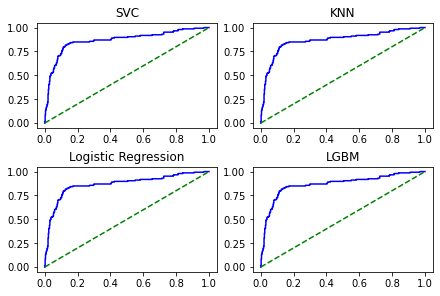

In [21]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fig, axes = plt.subplots(2, 2, constrained_layout=True)

svc = SVC(probability=True)
svc.fit(X_train_roc, y_train_roc)
prob = svc.predict_proba(X_test_roc)
prob = prob[:, 1]
a, b, thresholds = roc_curve(y_test_roc, prob)
axes[0, 0].plot(a, b, color='blue', label='SVC')
axes[0, 0].set_title("SVC")
axes[0, 0].plot([0, 1], [0, 1], color='green', linestyle='--')


KNN = KNeighborsClassifier(n_neighbors=14)
KNN.fit(X_train_roc, y_train_roc)
prob = svc.predict_proba(X_test_roc)
prob = prob[:, 1]
c, d, thresholds = roc_curve(y_test_roc, prob)
axes[0, 1].plot(c, d, color='blue', label='KNN')
axes[0, 1].set_title("KNN")
axes[0, 1].plot([0, 1], [0, 1], color='green', linestyle='--')

Logistic = LogisticRegression(C=932.5573593386588, penalty='l2', random_state=1)
Logistic.fit(X_train_roc, y_train_roc)
prob = svc.predict_proba(X_test_roc)
prob = prob[:, 1]
e, f, thresholds = roc_curve(y_test_roc, prob)
axes[1, 0].plot(e, f, color='blue', label='Logreg')
axes[1, 0].set_title("Logistic Regression")
axes[1, 0].plot([0, 1], [0, 1], color='green', linestyle='--')

LGBM = LGBMClassifier(max_depth=7, min_child_weight=8, learning_rate=0.01795, n_estimators=356, subsample=0.7899, colsample_bytree=0.8385, random_state=1)
LGBM.fit(X_train_roc, y_train_roc)
prob = svc.predict_proba(X_test_roc)
prob = prob[:, 1]
g, h, thresholds = roc_curve(y_test_roc, prob)
axes[1, 1].plot(g, h, color='blue', label='LGBM')
axes[1, 1].set_title("LGBM")
axes[1, 1].plot([0, 1], [0, 1], color='green', linestyle='--')

In [37]:
svc = SVC(probability=True)
svc.fit(X_train_roc, y_train_roc)
prediction = svc.predict(X_test_roc)
print('SVC auc score : {}'.format(roc_auc_score(y_test_roc, prediction)))

KNN = KNeighborsClassifier(n_neighbors=14)
KNN.fit(X_train_roc, y_train_roc)
prediction = KNN.predict(X_test_roc)
print('KNN auc score : {}'.format(roc_auc_score(y_test_roc, prediction)))

Logistic = LogisticRegression(C=932.5573593386588, penalty='l2', random_state=1)
Logistic.fit(X_train_roc, y_train_roc)
prediction = Logistic.predict(X_test_roc)
print('LogisticRegression auc score : {}'.format(roc_auc_score(y_test_roc, prediction)))

LGBM = LGBMClassifier(max_depth=7, min_child_weight=8, learning_rate=0.01795, n_estimators=356, subsample=0.7899, colsample_bytree=0.8385, random_state=1)
LGBM.fit(X_train_roc, y_train_roc)
prediction = LGBM.predict(X_test_roc)
print('LGBM auc score : {}'.format(roc_auc_score(y_test_roc, prediction)))

SVC auc score : 0.741792891195462
KNN auc score : 0.7370255265222377
LogisticRegression auc score : 0.6065264618912558
LGBM auc score : 0.756834228471426


# Predict

In [22]:
test1.head()

,star,img,dict_score,text_len,senti_analy
0,1.5,10,-1,51,-5
1,2.5,10,1,33,5
2,1.5,0,2,32,5
3,2.5,0,2,32,5
4,2.0,10,0,32,5


In [23]:
prediction = svc.predict(test1)
test1['prediction'] = prediction

In [61]:
prediction2 = LGBM.predict(test2)
test2['prediction'] = prediction2

### 유용한 댓글 확인해보기

In [24]:
test1.loc[test1['prediction']==1]

,star,img,dict_score,text_len,senti_analy,prediction
2157,2.5,40,9,184,5,1
2162,2.0,0,11,156,5,1
2163,2.5,0,4,155,5,1
2165,2.5,20,4,184,5,1
2168,2.5,20,-2,210,-5,1
2178,2.5,0,13,156,5,1
2179,2.5,0,2,227,5,1
2187,2.5,20,0,234,5,1
2188,2.5,20,0,167,5,1
2191,2.0,0,8,158,5,1


In [25]:
df = pd.read_excel('teeth_data/teeth_test_re.xlsx', index_col=0)

In [42]:
df.loc[2157, 'modi_text']

'지금은 금연을 하고 있는데 예전에는 담배를 오래 폈거든요 그랬더니 이빨 색깔이 착색되어가지고 누런 게 너무 보기 싫더라고요 그래서 치아미백 지른 찾던 중 이 제품을 사용해보았는데요 쓰기도 편리하고 관리하기도 좋아서 정말 만족합니다 솔이 달려있어서 사용하기도 편하고 약도 정량이 적당하게 나와서 관리하기도 편해서 정말 마음에 듭니다'

In [53]:
df.loc[2191,'modi_text']

'정말 될까 하면서 궁금하기도 하고 미백이 절실해서 구매하고 했는데 정말 확실히 하기 일주일 전이랑 후가 달라서 또 구매 안 할 수가 없어서 재구매했네요 사용하기도 편해서 매일매일 하게 돼요 더 하다 보면 더 예쁘게 미백이 될 거 같아요 꼼꼼하게 포장해서 빠른 배송해주셔서 감사합니다 '

### 유용하지 않은 댓글 확인해보기

In [28]:
test1.loc[test1['prediction']==0]

,star,img,dict_score,text_len,senti_analy,prediction
0,1.5,10,-1,51,-5,0
1,2.5,10,1,33,5,0
2,1.5,0,2,32,5,0
3,2.5,0,2,32,5,0
4,2.0,10,0,32,5,0
...,...,...,...,...,...,...
3128,2.5,40,7,612,5,0
3129,2.5,20,-2,365,5,0
3134,0.5,20,-1,379,-5,0
3138,2.5,20,-7,364,5,0


In [29]:
df.loc[0, 'modi_text']

'사실 잘 모르겠는데 그냥 안 쓴 것보다는 낫겠지 생각해요 치약이랑 같이 쓰는데 다 써보려고요'

In [30]:
df.loc[1, 'modi_text']

'아직 사용 전이지만 기대하고 써봐야죠 안 한 것보단 낫겠죠 '

In [31]:
df.loc[3115, 'modi_text']

'저는 남자친구 선물용으로 구입을 했고요 남자친구가 담배를 입에 달고 사는데 누런 이 때문에 스트레스를 받더라고요 그렇다고 담배는 못 끊고 살고 치아미백은 하고 싶다는데 비용 때문에 망설이는 건지 쉽게 안 하려고 하네요 뭔가 도움을 주고 싶어서 치아미백제 상품들을 찾아보다가 미소밤을 알게 됐어요 이름처럼 환한 미소를 지을 수 있게 만들어주는 거라 미소밤인가요 남자친구한테 주니까 엄청 좋아해요 사용하는 방식이 너무 간단하네요 양치를 하고 치아를 건조하고 제품 아래쪽을 빙빙 돌려주니까 하얀 치아를 책임지는 투명한 액체가 나와요 냄새는 약간 가글 치약 냄새라고 해야 하나 거북하지 않은 냄새에요 물론 제기 중에서 요 잇몸이랑 입술에 최대한 닿지 않게 꼼꼼하게 발라주고 30분 기다리면 끝이네요 기다리는 거 힘들 줄 알았는데 남자친구는 아무렇지 않게 잘 기다리네요 대망의 30분이 끝나고 열심히 헹구어주고 여기 안에 같이 있던 진단 종이로 치아 단계를 확인해주었는데 금세 밝아지는 기분이었어요 무엇보다 남자친구가 이거 한번 쓰고 입 헹굴 때 개운하고 시원해서 좋대요 앞으로 매일 꾸준히 쓰면서 관리한다네요 '